## Irap & Mona data merge, 2nd EDA with statsmodel

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression 

#### import and merge data

In [2]:
path = "../Final Soft Launch Results/Current Source Data/"

In [3]:
d1="Data from IRAP 01072020.xlsx"
d2="Merge for Vulnerability Screening.xlsx"
d3="Raw Data from Mona 01172020.xlsx"

In [4]:
irap = pd.read_excel (path+d1)
mona = pd.read_excel (path+d3)

In [5]:
irap['process_days'] = irap['Date of Screening Decision']-irap['Date of Screening Start']
irap['process_days'] = irap['process_days'].astype('timedelta64[D]')
irap['process_daysA'] = irap['Date of Screening Start']-irap['Date of Referral']
irap['process_daysA'] = irap['process_daysA'].astype('timedelta64[D]')
irap['process_daysC'] = irap['Date of Screening Decision']-irap['Date of Referral']
irap['process_daysC'] = irap['process_daysC'].astype('timedelta64[D]')

In [6]:
filter_col = [col for col in irap if col.startswith('Date')]
filter_col

['Date of Referral', 'Date of Screening Start', 'Date of Screening Decision']

In [7]:
mona = mona.rename({'Contact UUID': 'Mona Unique User ID'}, axis=1)

In [99]:
full = pd.merge(irap, mona, on='Mona Unique User ID',how="outer").dropna(axis=1, how='all')

In [100]:
full.shape

(7676, 339)

In [101]:
full['Field:Gender'].replace(('Male', 'Female'), (1, 0), inplace=True)
full['Vulnerability Threshold'].replace(('Above', 'Below'), (1, 0), inplace=True)

In [102]:
def one_hot(dataframe,column_name):
    gen_onehot_features = pd.get_dummies(dataframe[column_name])
    result = pd.concat([dataframe, gen_onehot_features],axis=1)
    return result

In [103]:
full['Field:Nationality1'] = 'nationality_' + full['Field:Nationality1']
full = one_hot(full,'Field:Nationality1')


In [104]:
full['Field:Current Country'] = 'curr_country_' + full['Field:Current Country']
full = one_hot(full,'Field:Current Country')

In [105]:
numeric = full.select_dtypes(exclude=['object','datetime64[ns]'])

In [106]:
full.head()

,Mona Unique Session ID,Mona Unique User ID,Created on,Created by,Pipeline,Date of Referral,First Referral,In IRAP Process,Screening Stage,Screener,...,curr_country_the United States,curr_country_أوكرانيا,curr_country_إيطاليا,curr_country_اليونان,curr_country_جزيرة كوس اليونان,curr_country_جورجيا تبليسي,curr_country_قطاع غزة,curr_country_كندا,curr_country_نعم أنا في إيطاليا,curr_country_يونان
0,ce81140c-7083-4463-90ed-ad36d1a41011.2019-07-2...,ce81140c-7083-4463-90ed-ad36d1a41011,2019-12-11 06:02:17,Brooke Sauro,Mona,2019-07-25,No,No,Screening Complete,Michaela Gallien,...,0,0,0,0,0,0,0,0,0,0
1,92952aa434524f549543d3fcc79054fe20190804T02434...,92952aa4-3452-4f54-9543-d3fcc79054fe,2019-12-11 06:02:17,Brooke Sauro,Mona,2019-08-03,No,Yes,Screening Complete,Manal ElKhoury,...,0,0,0,0,0,0,0,0,0,0
2,92952aa434524f549543d3fcc79054fe20190806T11414...,92952aa4-3452-4f54-9543-d3fcc79054fe,2019-10-07 08:21:12,Brooke Sauro,Mona,2019-08-08,Yes,No,Screening,Manal ElKhoury,...,0,0,0,0,0,0,0,0,0,0
3,8a4a87a6eeeb43019d820644a8a7534620190802T07350...,8a4a87a6-eeeb-4301-9d82-0644a8a75346,2019-12-11 06:02:17,Brooke Sauro,Mona,2019-08-02,No,No,Screening,Tiba Fatli,...,0,0,0,0,0,0,0,0,0,0
4,758240c9578a4e29b66bd1d95de9cdc620190802T21293...,758240c9-578a-4e29-b66b-d1d95de9cdc6,2019-12-11 06:02:17,Brooke Sauro,Mona,2019-08-02,No,No,Screening Complete,Tania El Khoury,...,0,0,0,0,0,0,0,0,0,0


#### Create processing time related variables

In [17]:
def label_process_day_1(row):
    if row['process_days'] >= 1 :
        return 1
    if row['process_days'] == 0 :
        return 0
    else: return np.nan
def label_process_day_7(row):
    if row['process_days'] >= 7 :
        return 1
    if row['process_days'] <7 :
        return 0
    else: return np.nan
def label_process_dayA_1(row):
    if row['process_daysA'] >= 1 :
        return 1
    if row['process_daysA'] == 0 :
        return 0
    else: return np.nan
def label_process_dayC_1(row):
    if row['process_daysC'] >= 1 :
        return 1
    if row['process_daysC'] == 0 :
        return 0
    else: return np.nan

In [18]:
# result['process_day_>=1'] = result['process_days']>=1
# result['process_day_>=1'] *=1
# result['process_day_>=7'] = result['process_days']>=7
# result['process_day_>=7'] *=1

In [19]:
result['process_day_>=1'] = result.apply (lambda row: label_process_day_1(row), axis=1)
result['process_day_>=7'] = result.apply (lambda row: label_process_day_7(row), axis=1)

In [20]:
result['process_dayA_>=1'] = result.apply (lambda row: label_process_dayA_1(row), axis=1)
result['process_dayC_>=1'] = result.apply (lambda row: label_process_dayC_1(row), axis=1)

In [21]:
full['process_day_>=1'] = full.apply (lambda row: label_process_day_1(row), axis=1)
full['process_day_>=7'] = full.apply (lambda row: label_process_day_7(row), axis=1)
full['process_dayA_>=1'] = full.apply (lambda row: label_process_dayA_1(row), axis=1)
full['process_dayC_>=1'] = full.apply (lambda row: label_process_dayC_1(row), axis=1)
full['Medical_X_LPPN'] = full['Field:Medical Needs Score'] * full['Field:LPPN Score']

### Look into potential interaction effect between Medical and LPPN

In [22]:
interaction = result[['process_days','Field:Medical Needs Score','Field:LPPN Score']]

In [23]:
interaction['Medical_X_LPPN'] = interaction['Field:Medical Needs Score'] * interaction['Field:LPPN Score']

/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
interaction['process_day_>=1'] = interaction['process_days']>=1
interaction['process_day_>=1'] *=1
interaction['process_day_>=7'] = interaction['process_days']>=7
interaction['process_day_>=7'] *=1

/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_in

In [25]:
interaction = interaction.dropna()
interaction.head()

,process_days,Field:Medical Needs Score,Field:LPPN Score,Medical_X_LPPN,process_day_>=1,process_day_>=7
3,0.0,0.0,0.0,0.0,0,0
5,0.0,0.0,0.0,0.0,0,0
7,0.0,0.0,0.0,0.0,0,0
13,26.0,5.0,3.0,15.0,1,1
16,30.0,0.0,0.0,0.0,1,1


In [26]:
X = interaction[['Field:Medical Needs Score', 'Field:LPPN Score',
       'Medical_X_LPPN']]
X2 = interaction[['Field:Medical Needs Score', 'Field:LPPN Score']]
y1 = interaction['process_day_>=1']
y7 = interaction['process_day_>=7']

#### It turns out that the product of Medical and LPPN scores are much more relevant than the sum, or the individual predictors

In [27]:
import statsmodels.api as sm
# logit_model=sm.Logit(y1,X)
process_day1=sm.Logit(y1,X).fit(maxiter=1000)
print(process_day1.summary())


Optimization terminated successfully.
         Current function value: 0.662010
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        process_day_>=1   No. Observations:                  358
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                            2
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:                -0.03796
Time:                        13:40:38   Log-Likelihood:                -237.00
converged:                       True   LL-Null:                       -228.33
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Field:Medical Needs Score    -0.2116      0.053     -3.960      0.000      -0.

In [28]:
process_day7=sm.Logit(y7,X).fit()
print(process_day7.summary())

Optimization terminated successfully.
         Current function value: 0.628652
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        process_day_>=7   No. Observations:                  358
Model:                          Logit   Df Residuals:                      355
Method:                           MLE   Df Model:                            2
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:                -0.09746
Time:                        13:40:38   Log-Likelihood:                -225.06
converged:                       True   LL-Null:                       -205.07
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Field:Medical Needs Score    -0.2423      0.055     -4.381      0.000      -0.

In [29]:
# import statsmodels.api as sm
# logit_model=sm.Logit(y1,X)
process_day1=sm.Logit(y1,X2).fit(maxiter=10000)
print(process_day1.summary())


Optimization terminated successfully.
         Current function value: 0.685613
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        process_day_>=1   No. Observations:                  358
Model:                          Logit   Df Residuals:                      356
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:                -0.07497
Time:                        13:40:38   Log-Likelihood:                -245.45
converged:                       True   LL-Null:                       -228.33
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Field:Medical Needs Score    -0.0848      0.040     -2.134      0.033      -0.

In [30]:
process_day7=sm.Logit(y7,X2).fit()
print(process_day7.summary())

Optimization terminated successfully.
         Current function value: 0.666810
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:        process_day_>=7   No. Observations:                  358
Model:                          Logit   Df Residuals:                      356
Method:                           MLE   Df Model:                            1
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:                 -0.1641
Time:                        13:40:38   Log-Likelihood:                -238.72
converged:                       True   LL-Null:                       -205.07
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Field:Medical Needs Score    -0.0832      0.040     -2.061      0.039      -0.

### Medical or LPPN score above threshold

#### Crosstab

In [32]:
result['Medical_OR_LPPN_Abovethresh'] = np.where( (result["Field:Medical Needs Score"] >=5)  | (result["Field:LPPN Score"] >=5), "Above", "Below")


In [33]:
pd.crosstab(result['Medical_OR_LPPN_Abovethresh'],result['Vulnerability Threshold'],margins = False)

Vulnerability Threshold,Above,Below
Medical_OR_LPPN_Abovethresh,,
Above,8,163
Below,7,542


In [34]:
result[(result['Medical_OR_LPPN_Abovethresh']=="Above") & (result['Vulnerability Threshold']=="Above") ]

,Mona Unique Session ID,Mona Unique User ID,Created on,Created by,Pipeline,Date of Referral,First Referral,In IRAP Process,Screening Stage,Screener,...,process_days,process_daysA,process_daysC,Field:Medical Needs Score,Field:LPPN Score,process_day_>=1,process_day_>=7,process_dayA_>=1,process_dayC_>=1,Medical_OR_LPPN_Abovethresh
358,cf9221c73c564d7b93fc0eb2a400d52e20190805T16361...,cf9221c7-3c56-4d7b-93fc-0eb2a400d52e,2019-10-17 05:27:13,Brooke Sauro,Mona,2019-08-05,Yes,No,Screening Complete,Tiba Fatli,...,7.0,115.0,122.0,5.0,6.0,1.0,1.0,1.0,1.0,Above
361,c1c0741a-5110-419a-aaa0-b4f8d8bc0ada.2019-07-2...,c1c0741a-5110-419a-aaa0-b4f8d8bc0ada,2019-10-17 05:27:12,Brooke Sauro,Mona,2019-07-29,Yes,No,Screening Complete,Tiba Fatli,...,16.0,106.0,122.0,6.0,6.0,1.0,1.0,1.0,1.0,Above
406,a373b632294c40ffbe1f36e54b48fb2b20190802T23075...,a373b632-294c-40ff-be1f-36e54b48fb2b,2019-10-07 08:23:44,Brooke Sauro,Mona,2019-08-03,Yes,No,Screening Complete,Manal ElKhoury,...,12.0,117.0,129.0,5.0,NaN,1.0,1.0,1.0,1.0,Above
459,e4beefb1-cdb3-415a-b557-672bc70829ce.2019-07-2...,e4beefb1-cdb3-415a-b557-672bc70829ce,2019-10-07 08:23:23,Brooke Sauro,Mona,2019-07-25,Yes,No,Screening Complete,Tania El Khoury,...,134.0,3.0,137.0,0.0,6.0,1.0,1.0,1.0,1.0,Above
520,c13fb63772754238ba8be4e3fd10b0a020190730T21454...,c13fb637-7275-4238-ba8b-e4e3fd10b0a0,2019-10-07 08:23:01,Brooke Sauro,Mona,2019-07-30,Yes,No,Screening Complete,Michaela Gallien,...,7.0,36.0,43.0,5.0,0.0,1.0,1.0,1.0,1.0,Above
623,63b4f019973146c68bd1ee2c66d3047b20190801T01161...,63b4f019-9731-46c6-8bd1-ee2c66d3047b,2019-10-07 08:22:30,Brooke Sauro,Mona,2019-07-25,Yes,No,Screening Complete,Tiba Fatli,...,31.0,102.0,133.0,6.0,6.0,1.0,1.0,1.0,1.0,Above
686,fca5a901-9974-48e0-a3d9-627f699e5905.2019-07-2...,fca5a901-9974-48e0-a3d9-627f699e5905,2019-10-07 08:22:10,Brooke Sauro,Mona,2019-07-28,Yes,No,Screening,Tania El Khoury,...,NaN,10.0,NaN,5.0,6.0,NaN,NaN,1.0,NaN,Above
716,b96ddbddb762459bbc2aa23213d0ce9c20190731T01193...,b96ddbdd-b762-459b-bc2a-a23213d0ce9c,2019-10-07 08:21:46,Brooke Sauro,Mona,2019-07-31,Yes,No,Screening,Tania El Khoury,...,NaN,49.0,NaN,5.0,0.0,NaN,NaN,1.0,NaN,Above


In [35]:
for i in result[(result['Medical_OR_LPPN_Abovethresh']=="Above") & (result['Vulnerability Threshold']=="Above") ]['Mona Unique Session ID']:
    print(i)

cf9221c73c564d7b93fc0eb2a400d52e20190805T1636113377840300
c1c0741a-5110-419a-aaa0-b4f8d8bc0ada.2019-07-29T04:08:40.308165+03:00
a373b632294c40ffbe1f36e54b48fb2b20190802T2307590342660300
e4beefb1-cdb3-415a-b557-672bc70829ce.2019-07-26T10:45:40.495406+03:00
c13fb63772754238ba8be4e3fd10b0a020190730T2145464433810300
63b4f019973146c68bd1ee2c66d3047b20190801T0116171295330300
fca5a901-9974-48e0-a3d9-627f699e5905.2019-07-29T00:08:15.243443+03:00
b96ddbddb762459bbc2aa23213d0ce9c20190731T0119372916290300


In [36]:
result[(result['Client Location (Country)']=="Lebanon") & (result['Client Nationality']=="Syrian") 
       & (result['First Referral']=="Yes") & (result['In IRAP Process']=="No") 
      & (result['Medical_OR_LPPN_Abovethresh']=="Above")]['Vulnerability Threshold'].value_counts()

Below    102
Above      8
Name: Vulnerability Threshold, dtype: int64

### Process days distribution

In [37]:
full['Vulnerability Threshold'].value_counts()

0.0    705
1.0     15
Name: Vulnerability Threshold, dtype: int64

In [38]:
full = full[full['process_days'] >= 0]
full = full[full['process_daysA'] >= 0]
full = full[full['process_daysC'] >= 0]

In [39]:
full.shape

(769, 339)

In [40]:
full_filtered = full.dropna(subset=['Vulnerability Threshold'])
# full_filtered = full_filtered(full_filtered['Vulnerability Threshold']>=0)
full_filtered.shape

(692, 339)

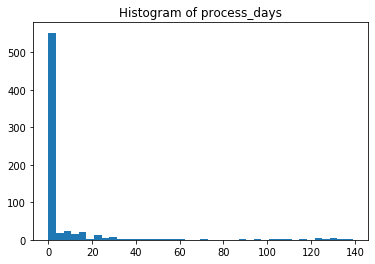

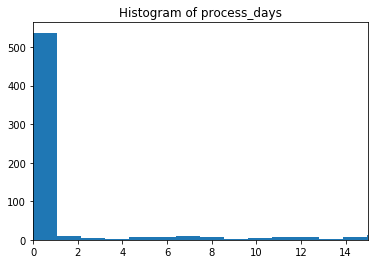

In [41]:
plt.hist(full_filtered['process_days'],bins=40)
# plt.xlim(0,)
plt.title("Histogram of process_days")
plt.show()

plt.hist(full_filtered['process_days'],bins=130)
plt.xlim(0,15)
plt.title("Histogram of process_days")
plt.show()

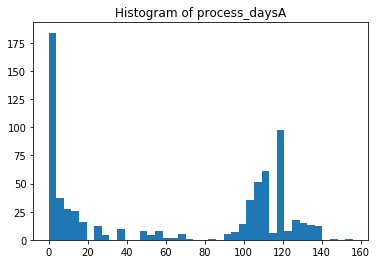

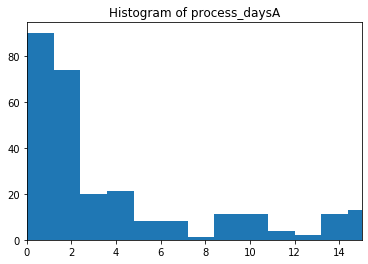

In [42]:
plt.hist(full_filtered['process_daysA'],bins=40)
# plt.xlim(0,)
plt.title("Histogram of process_daysA")
plt.show()

plt.hist(full_filtered['process_daysA'],bins=130)
plt.xlim(0,15)
plt.title("Histogram of process_daysA")
plt.show()

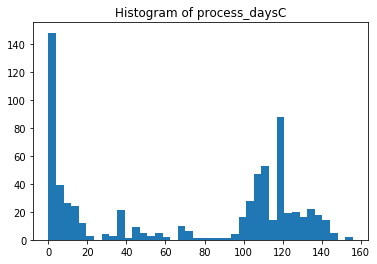

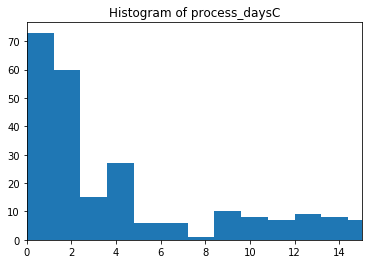

In [43]:
plt.hist(full_filtered['process_daysC'],bins=40)
# plt.xlim(0,)
plt.title("Histogram of process_daysC")
plt.show()

plt.hist(full_filtered['process_daysC'],bins=130)
plt.xlim(0,15)
plt.title("Histogram of process_daysC")
plt.show()

#### Look at all variables

In [44]:
dat = full_filtered.select_dtypes(include=['int','float64'])
dat = dat.drop(['process_daysA','process_daysC','process_dayA_>=1','process_dayC_>=1'],axis=1)
dat = dat.drop(dat.columns[dat.isnull().mean()>0.6], axis=1).dropna()
dat = dat.drop(['Vulnerability Threshold','process_days','URN:Facebook',],axis=1).dropna()
dat

,Field:Age,Field:Gender,Field:Traumatic Incident 1 Assessment,Field:LPPN Score,Field:Medical Needs Score,Field:Years in Current Country,process_day_>=1,process_day_>=7,Medical_X_LPPN
3,33.0,1.0,4.0,0.0,0.0,6.0,0.0,0.0,0.0
5,44.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0
7,30.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,0.0
16,41.0,1.0,2.0,0.0,0.0,6.0,1.0,1.0,0.0
20,23.0,1.0,5.0,4.0,5.0,2.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...
868,36.0,1.0,5.0,1.0,0.0,7.0,1.0,1.0,0.0
879,40.0,1.0,5.0,4.0,5.0,6.0,0.0,0.0,20.0
880,29.0,1.0,4.0,0.0,0.0,5.0,0.0,0.0,0.0
882,28.0,1.0,3.0,0.0,0.0,4.0,1.0,1.0,0.0


In [45]:
X = dat.drop(['process_day_>=1','process_day_>=7'],axis=1)
y1 = dat['process_day_>=1']
# y2 = dat['process_dayA_>=1']
# y3 = dat['process_dayC_>=1']

y7 = dat[['process_day_>=7']]

In [46]:
X

,Field:Age,Field:Gender,Field:Traumatic Incident 1 Assessment,Field:LPPN Score,Field:Medical Needs Score,Field:Years in Current Country,Medical_X_LPPN
3,33.0,1.0,4.0,0.0,0.0,6.0,0.0
5,44.0,1.0,1.0,0.0,0.0,5.0,0.0
7,30.0,1.0,1.0,0.0,0.0,5.0,0.0
16,41.0,1.0,2.0,0.0,0.0,6.0,0.0
20,23.0,1.0,5.0,4.0,5.0,2.0,20.0
...,...,...,...,...,...,...,...
868,36.0,1.0,5.0,1.0,0.0,7.0,0.0
879,40.0,1.0,5.0,4.0,5.0,6.0,20.0
880,29.0,1.0,4.0,0.0,0.0,5.0,0.0
882,28.0,1.0,3.0,0.0,0.0,4.0,0.0


In [49]:
X2=dat[['Field:Traumatic Incident 1 Assessment']]
X3=dat[['Field:Years in Current Country']]

#### Select variables using p-value

In [50]:
selected_columns= X.columns.values

def backwardElimination(x, Y, sl, columns):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_Logit = sm.Logit(Y, x).fit(method='bfgs',maxiter=400)
        maxVar = max(regressor_Logit.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_Logit.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
                    columns = np.delete(columns, j)
    regressor_Logit.summary()
    return x, columns
SL = 0.05


In [51]:
_, selected_columns = backwardElimination(X.values, y1.values, SL, selected_columns)
print(selected_columns)

Optimization terminated successfully.
         Current function value: 0.575223
         Iterations: 39
         Function evaluations: 43
         Gradient evaluations: 43
Optimization terminated successfully.
         Current function value: 0.575407
         Iterations: 38
         Function evaluations: 44
         Gradient evaluations: 44
Optimization terminated successfully.
         Current function value: 0.575894
         Iterations: 30
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.579517
         Iterations: 21
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.583256
         Iterations: 25
         Function evaluations: 29
         Gradient evaluations: 29
Optimization terminated successfully.
         Current function value: 0.593103
         Iterations: 6
         Function evaluations: 8
    

#### Random forest and downsample functions

In [52]:
def rforest_100x(depth_upper,x,y,samplemethod):
    X_train, X_test, y_train, y_test = samplemethod(x, y)
    train_acc=[]
    test_acc=[]
    depth=[]
    auc=[]

    for i in np.arange(1,depth_upper,1):
        ind_train_acc=[]
        ind_test_acc=[]
        ind_auc=[]

        for k in range(100):
            rf=RandomForestClassifier(100, 
                                      max_depth=i, 
                                      criterion='gini')
            rf.fit(X_train, y_train)
            y_true = y_test
            y_pred = rf.predict(X_test)
            y_pred_proba = rf.predict_proba(X_test)

            ind_train_acc.append(np.round(rf.score(X_train, y_train),4))
            ind_test_acc.append(rf.score(X_test,y_test))
            ind_auc.append(roc_auc_score(y_true, y_pred_proba[:,1]))
        
        train_acc.append(np.mean(ind_train_acc))
        test_acc.append(np.mean(ind_test_acc))
        auc.append(np.mean(ind_auc))
        depth.append(i)
        
    plt.plot(depth,train_acc)
    plt.plot(depth,test_acc)
    plt.plot(depth,auc)


    ymax = max(auc)
    xpos = auc.index(ymax)
    xmax = depth[xpos]
    acc = test_acc[xpos]

    plt.plot(xmax, ymax, 'g*')
    plt.annotate("Depth: {}, auc: {:.3f}, test accuracy: {:.3f}".format(xmax,ymax,acc),
                 (xmax, ymax),)
    plt.title("Random Forest: Depth 1 to {}".format(depth_upper))

    plt.show()

#     return(roc[xpos])

In [53]:
def downsample_split(X,y):
    var= y.name
    #combine them for resampling
    train_data = pd.concat([X, y], axis=1)
    # separate minority and majority classes
    negative = train_data[train_data[var]==0]
    positive = train_data[train_data[var]==1]

    # downsample majority
    neg_downsampled = resample(negative,
        replace=True, # sample with replacement
        n_samples=len(positive), # match number in minority class
        ) # reproducible results
    
    
    # combine majority and upsampled minority
    upsampled = pd.concat([neg_downsampled, positive])
    
    X_train, X_test, y_train, y_test = train_test_split( 
        upsampled.drop(var,axis=1), upsampled[var], stratify=upsampled[var],
        test_size=0.33,)
    
    # check new class counts
#     print(y_train.value_counts())

    return X_train, X_test, y_train, y_test

In [54]:
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc


In [55]:
model = RandomForestClassifier(max_depth=4,n_estimators = 64,criterion='gini')
model.fit(X,y1)
sorted(list(zip(model.feature_importances_,X.columns)), reverse=True)

[(0.21631607622633509, 'Field:LPPN Score'),
 (0.19133234012500855, 'Medical_X_LPPN'),
 (0.17417105270902933, 'Field:Age'),
 (0.17340225264334108, 'Field:Years in Current Country'),
 (0.11759569079086037, 'Field:Medical Needs Score'),
 (0.08846199089927186, 'Field:Traumatic Incident 1 Assessment'),
 (0.038720596606153616, 'Field:Gender')]

In [57]:
dat = full_filtered.select_dtypes(include=['int','float64'])
dat = dat.drop(['process_daysA','process_daysC'],axis=1)
dat = dat.drop(dat.columns[dat.isnull().mean()>0.6], axis=1).dropna()
dat = dat.drop(['Vulnerability Threshold','process_days','URN:Facebook',],axis=1).dropna()
dat

,Field:Age,Field:Gender,Field:Traumatic Incident 1 Assessment,Field:LPPN Score,Field:Medical Needs Score,Field:Years in Current Country,process_day_>=1,process_day_>=7,process_dayA_>=1,process_dayC_>=1,Medical_X_LPPN
3,33.0,1.0,4.0,0.0,0.0,6.0,0.0,0.0,1.0,1.0,0.0
5,44.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0
7,30.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0
16,41.0,1.0,2.0,0.0,0.0,6.0,1.0,1.0,1.0,1.0,0.0
20,23.0,1.0,5.0,4.0,5.0,2.0,0.0,0.0,1.0,1.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...
868,36.0,1.0,5.0,1.0,0.0,7.0,1.0,1.0,1.0,1.0,0.0
879,40.0,1.0,5.0,4.0,5.0,6.0,0.0,0.0,1.0,1.0,20.0
880,29.0,1.0,4.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,0.0
882,28.0,1.0,3.0,0.0,0.0,4.0,1.0,1.0,1.0,1.0,0.0


In [58]:
X = dat.drop(['process_day_>=1','process_day_>=7','process_dayA_>=1','process_dayC_>=1'],axis=1)
y1 = dat['process_day_>=1']
y2 = dat['process_dayA_>=1']
y3 = dat['process_dayC_>=1']

y7 = dat[['process_day_>=7']]

#### Factors that affect process day type A

In [60]:
process_day1=sm.Logit(y2,X).fit(maxiter=6000)
print(process_day1.summary())


         Current function value: 0.019581
         Iterations: 6000
                           Logit Regression Results                           
Dep. Variable:       process_dayA_>=1   No. Observations:                  234
Model:                          Logit   Df Residuals:                      227
Method:                           MLE   Df Model:                            6
Date:                Mon, 13 Apr 2020   Pseudo R-squ.:                  0.2900
Time:                        13:42:30   Log-Likelihood:                -4.5820
converged:                      False   LL-Null:                       -6.4532
Covariance Type:            nonrobust   LLR p-value:                    0.7115
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
Field:Age                                 0.2150      0.229      0.938      0.348      -

/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [62]:
X2=dat[['Field:Traumatic Incident 1 Assessment']]
X3=dat[['Field:Years in Current Country']]

In [63]:
selected_columns= X.columns.values

In [64]:
_, selected_columns = backwardElimination(X.values, y2.values, SL, selected_columns)
print(selected_columns)

/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/xiaoxiangma/anaconda3/lib/p

Optimization terminated successfully.
         Current function value: 0.019581
         Iterations: 67
         Function evaluations: 75
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 0.019581
         Iterations: 67
         Function evaluations: 75
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 0.019581
         Iterations: 67
         Function evaluations: 75
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 0.019581
         Iterations: 67
         Function evaluations: 75
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 0.019581
         Iterations: 67
         Function evaluations: 75
         Gradient evaluations: 74
Optimization terminated successfully.
         Current function value: 0.019581
         Iterations: 67
         Function evaluations: 75
  

/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1747: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py:1800: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:548: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/Users/xiaoxiangma/anaconda3/lib/p

In [ ]:
rforest_100x(20,X,y2, downsample_split)


In [ ]:
rforest_100x(20,X,y3, downsample_split)


/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


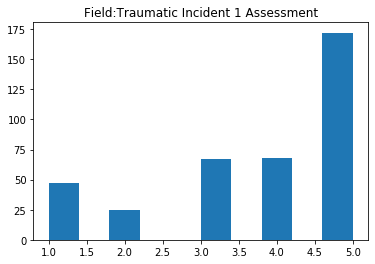

In [65]:
plt.hist(full["Field:Traumatic Incident 1 Assessment"])
plt.title("Field:Traumatic Incident 1 Assessment")
plt.show()

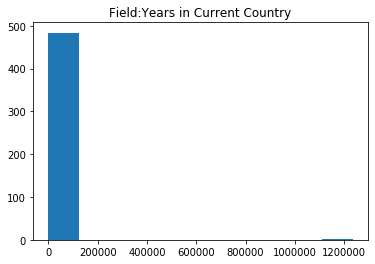

In [66]:
plt.hist(full["Field:Years in Current Country"])
plt.title("Field:Years in Current Country")
plt.show()

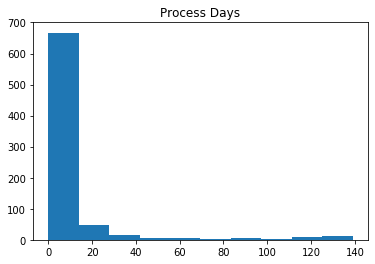

In [67]:
plt.hist(full["process_days"])
plt.title("Process Days")
plt.show()

###  Preperation for Data Cleaning


field names, values, and percentage missing

In [68]:
full.shape

(769, 339)

In [86]:
null_count = pd.Series.to_frame(full.isna().sum())
# null_count.rename(columns={"0": "null_count"})
null_count.columns = ["null_counts"]
null_count["null_percent"] = np.round(null_count["null_counts"] / 769 , 2)
null_count["dtype"] = pd.Series.to_frame(full.dtypes)
null_count["sample_value"] = full.mode()[:1].T
null_count

,null_counts,null_percent,dtype,sample_value
Mona Unique Session ID,0,0.00,object,003b4c8a-fa26-4d7c-bb47-c27109b757e3.2019-07-2...
Mona Unique User ID,169,0.22,object,22975d7c-8975-4578-9286-9d8221d83a14
Created on,0,0.00,datetime64[ns],2019-10-07 08:21:19
Created by,0,0.00,object,Brooke Sauro
Pipeline,0,0.00,object,Mona
...,...,...,...,...
process_day_>=1,0,0.00,float64,0
process_day_>=7,0,0.00,float64,0
process_dayA_>=1,0,0.00,float64,1
process_dayC_>=1,0,0.00,float64,1


In [90]:
null_count.loc['Field:Siv Follow To Join Relative Name 1']

null_counts        768
null_percent         1
dtype           object
sample_value      سامر
Name: Field:Siv Follow To Join Relative Name 1, dtype: object

In [87]:
null_count.to_csv("null_counts.csv")

In [74]:
full.columns

Index(['Mona Unique Session ID', 'Mona Unique User ID', 'Created on',
       'Created by', 'Pipeline', 'Date of Referral', 'First Referral',
       'In IRAP Process', 'Screening Stage', 'Screener',
       ...
       'curr_country_Iraq', 'curr_country_Lebanon',
       'curr_country_Saudi Arabia', 'curr_country_Syria',
       'curr_country_Turkey', 'process_day_>=1', 'process_day_>=7',
       'process_dayA_>=1', 'process_dayC_>=1', 'Medical_X_LPPN'],
      dtype='object', length=339)

In [76]:
pd.Series.to_frame(full.dtypes)

,0
Mona Unique Session ID,object
Mona Unique User ID,object
Created on,datetime64[ns]
Created by,object
Pipeline,object
...,...
process_day_>=1,float64
process_day_>=7,float64
process_dayA_>=1,float64
process_dayC_>=1,float64


In [85]:
full.mode()[:1].T

,0
Mona Unique Session ID,003b4c8a-fa26-4d7c-bb47-c27109b757e3.2019-07-2...
Mona Unique User ID,22975d7c-8975-4578-9286-9d8221d83a14
Created on,2019-10-07 08:21:19
Created by,Brooke Sauro
Pipeline,Mona
...,...
process_day_>=1,0
process_day_>=7,0
process_dayA_>=1,1
process_dayC_>=1,1


In [84]:
full.mode(axis='columns')

/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:846: UserWarning: Unable to sort modes: '<' not supported between instances of 'str' and 'float'
  warn(f"Unable to sort modes: {err}")
/Users/xiaoxiangma/anaconda3/lib/python3.7/site-packages/pandas/core/algorithms.py:846: UserWarning: Unable to sort modes: '<' not supported between instances of 'float' and 'str'
  warn(f"Unable to sort modes: {err}")


,0,1,2
0,0,NaN,NaN
3,0,NaN,NaN
4,0,NaN,NaN
5,0,NaN,NaN
7,0,NaN,NaN
...,...,...,...
1080,0,NaN,NaN
1081,0,NaN,NaN
1083,0,NaN,NaN
1084,0,NaN,NaN
